In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Problem 1

In [151]:
# Init Vars
#rotation matrix
cRw = np.array([[0.707, 0.707, 0],[-0.707, 0.707, 0],[0, 0, 1]])
#translation vector
ctw = np.array([[-3],[-.5],[3]])

# Transformation matrix
cTw = np.column_stack((cRw,ctw))
# K matrix
K = np.array([[-100, 0, 200],[0, -100, 200],[0, 0 ,1]])

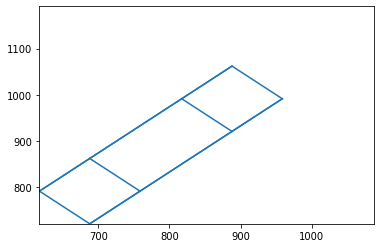

In [152]:
# points from lecture 6 example
pts =np.array(np.matrix('2 0 0 ;3 0 0;3 1 0;2 1 0;2 0 1 ;3 0 1;3 1 1;2 1 1;2.5 0.5 2'))

# empty matrix to store pixel coordinates
pixels = np.zeros((pts.shape[0],pts.shape[1]))

# M = K * transofrmation matrix
M = np.matmul(K,cTw)

# For each point calculate its pixel coordinate
for i in range(pts.shape[0]):
    pixels[i] = np.matmul(M,np.hstack((pts[i],1)))

xx = pixels[:,0] # All x values of pixels
yy = pixels[:,1] # All y values of pixels

fig = plt.figure()
ax = fig.add_subplot(111)



ax.add_line(lines.Line2D([xx[1-1], xx[2-1]], [yy[1-1], yy[2-1]]))
ax.add_line(lines.Line2D([xx[2-1], xx[3-1]], [yy[2-1], yy[3-1]]))
ax.add_line(lines.Line2D([xx[3-1], xx[4-1]], [yy[3-1], yy[4-1]]))
ax.add_line(lines.Line2D([xx[4-1], xx[1-1]], [yy[4-1], yy[1-1]]))

ax.add_line(lines.Line2D([xx[5-1], xx[6-1]], [yy[5-1], yy[6-1]]))
ax.add_line(lines.Line2D([xx[6-1], xx[7-1]], [yy[6-1], yy[7-1]]))
ax.add_line(lines.Line2D([xx[7-1], xx[8-1]], [yy[7-1], yy[8-1]]))
ax.add_line(lines.Line2D([xx[8-1], xx[5-1]], [yy[8-1], yy[5-1]]))

ax.add_line(lines.Line2D([xx[1-1], xx[5-1]], [yy[1-1], yy[5-1]]))
ax.add_line(lines.Line2D([xx[2-1], xx[6-1]], [yy[2-1], yy[6-1]]))
ax.add_line(lines.Line2D([xx[3-1], xx[7-1]], [yy[3-1], yy[7-1]]))
ax.add_line(lines.Line2D([xx[4-1], xx[8-1]], [yy[4-1], yy[8-1]]))

ax.set_xlim(min(xx),max(xx))
ax.set_ylim(min(yy),max(yy))
plt.show()





# Problem 2

In [153]:
#Take inverse to get camera w.r.t. world
wTc = np.linalg.inv(np.vstack((cTw,[0,0,0,1])))
print(wTc)

[[ 0.70721358 -0.70721358  0.          1.76803395]
 [ 0.70721358  0.70721358  0.          2.47524752]
 [ 0.          0.          1.         -3.        ]
 [ 0.          0.          0.          1.        ]]


The camera i the previous question w.r.t world coordinates is [1.76 2.475 -3]

# Problem 3

In [154]:
#change rotation to 30 degrees about z

#Rotation matrix
cRw = np.array([[0.866, 0.5, 0],[-0.5, 0.866, 0],[0, 0, 1]])
#Translation Vector
ctw = np.array([[-3],[-.5],[3]])

#Transformation matrix
cTw = np.column_stack((cRw,ctw))

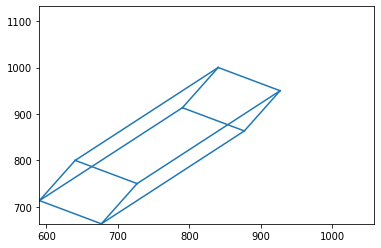

In [155]:
pts =np.array(np.matrix('2 0 0 ;3 0 0;3 1 0;2 1 0;2 0 1 ;3 0 1;3 1 1;2 1 1;2.5 0.5 2'))
pts

pixels = np.zeros((pts.shape[0],pts.shape[1]))
M = np.matmul(K,cTw)


for i in range(pts.shape[0]):
    pixels[i] = np.matmul(M,np.hstack((pts[i],1)))


xx = pixels[:,0]
yy = pixels[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)


ax.add_line(lines.Line2D([xx[1-1], xx[2-1]], [yy[1-1], yy[2-1]]))
ax.add_line(lines.Line2D([xx[2-1], xx[3-1]], [yy[2-1], yy[3-1]]))
ax.add_line(lines.Line2D([xx[3-1], xx[4-1]], [yy[3-1], yy[4-1]]))
ax.add_line(lines.Line2D([xx[4-1], xx[1-1]], [yy[4-1], yy[1-1]]))

ax.add_line(lines.Line2D([xx[5-1], xx[6-1]], [yy[5-1], yy[6-1]]))
ax.add_line(lines.Line2D([xx[6-1], xx[7-1]], [yy[6-1], yy[7-1]]))
ax.add_line(lines.Line2D([xx[7-1], xx[8-1]], [yy[7-1], yy[8-1]]))
ax.add_line(lines.Line2D([xx[8-1], xx[5-1]], [yy[8-1], yy[5-1]]))

ax.add_line(lines.Line2D([xx[1-1], xx[5-1]], [yy[1-1], yy[5-1]]))
ax.add_line(lines.Line2D([xx[2-1], xx[6-1]], [yy[2-1], yy[6-1]]))
ax.add_line(lines.Line2D([xx[3-1], xx[7-1]], [yy[3-1], yy[7-1]]))
ax.add_line(lines.Line2D([xx[4-1], xx[8-1]], [yy[4-1], yy[8-1]]))
ax.set_xlim(min(xx),max(xx))
ax.set_ylim(min(yy),max(yy))
plt.show()

# Problem 8

In [158]:
def triangulate_dlt(pl,pr, Rlr,tlr):
    # outpoint = triangulate_midpoint(rayleft,rayright,R,t);
    # Triangulate two rays for 3d reconstruction 

    plt = pl;
    prt = pr;

    # take cross product, to find smallest segment between rays
    
    q = np.cross(plt,np.matmul(Rlr,prt))
    q = q/np.linalg.norm(q) # normalize q
   


    # Find the scalars a,b,c from this equation
    # a (plt  + c (q) = b ( Rlr prt ) + Tlr
    # Solve 3 equations, 3 unknows, exact solution
    A = [plt,  np.matmul(-Rlr,prt), q];


    solveit = np.matmul(np.linalg.inv(A),tlr);
    a = solveit[1]
    b = solveit[2]
    c = solveit[3];


    # 3D point is a*plt + c*0.5*q

    outpoint = a*plt + c*0.5*q;
    return outpoint
